In [10]:
from collections import Counter
import numpy.random as r
import seaborn as sns
import numpy as np
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt

**A Simple Game**

Let's toss a coin ten times. How many Heads are there?

In [5]:
tosses = r.choice(["H","T"],10)
num_heads = Counter(tosses)["H"]
num_heads

4

If the coin was fair we should have seen 5 right? If we see something other than 5, then something is wrong? No, of course not. 

We know that know that we *might* see 5 Heads, that we *ought* to see 5 heads *on average*, that we can *expect* to see 5 heads. But we know that many different outcomes are possible, only some which include exactly 5 Heads. 

In fact, let's see a few of those different outcomes. If we repeat this expermiment a few times, we see that lots of different outcomes are possible, and common, and expected.

In [6]:
for i in range(5):
    tosses = r.choice(["H","T"],10)
    print "This time we see " + str(Counter(tosses)["H"]) + " heads."


This time we see 2 heads.
This time we see 3 heads.
This time we see 3 heads.
This time we see 8 heads.
This time we see 4 heads.


We can see quite a bit of variability between each of these different "experiments". Here, we did 5 experiments and saw 5 of the possible outcomes. If we do many more than 5 experiments, we can get a good and general sense of the set of all possible things we might ever expect to see from our coin tossing game.

In [7]:
def how_many_heads(N):
    draw = r.choice(["H","T"],N)
    return Counter(draw)["H"]

In [8]:
lots_of_experiments =  [how_many_heads(10) for i in range(10000)]

Now we see the full set of things that we could reasonably expect from our coin tossing game. We might see 8 Heads, we might see 2. Both are possible. Both are *less likely* than seeing 5, which is the *most likely* outcome. 

**Sampling Distribution**

The histogram we made above shows us the full set (or approximately) of outcomes we might ever see from our experiment. Any one experiment we conduct in the real world is but one sample from this hypothetical pool. For each experiment, we summarized the result with a single value (the total number of Heads), let's refer to this value as a *statistic* (or *test statistic* if we want to start getting real). The histogram above shows the full distribution of the test statistic if we consider the set of all possible experiments. This distribution is called the frequentist *sampling distribution* and is at the heart of all the classical statistical methods you've learned before. 

**A Simple Probability Distribution**

Let's come at this coin tossing game another way. The mathy way. 

Consider the probability of tossing a coin once and it landing heads. For a fair coin, $p(H) =.5$

Let's be a bit more general and consider not just a fair coin, but a coin with any possible bias. So we can characterize the coin by this amount of bias, which we'll call $\theta$. The probability of Heads will in fact define $\theta$, so $p(H) = \theta$ and $p(T) = 1 - \theta$.


If we toss the coin twice, what's the probability of two Heads? Well, because it's easy, let's just enumerate all the possibilities. 

$p(HH) = \theta * \theta  $

$p(HT) = \theta * (1 -\theta)  $

$p(TH) = (1 - \theta) * \theta  $

$p(TT) = (1 - \theta) * (1 - \theta) $

From the four possible outcomes, we see that there is 1 outcome with 2 Heads, 1 outcome with 2 Tails and 2 outcomes with 1 Heads. Now we can update our estimates:

$p(Two Heads) = \theta * \theta  $

$p(One Heads) = 2 * \theta * (1 -\theta)  $

$p(Two Tails) = (1 - \theta) * (1 - \theta) $

As we as ask these same basic questions but about 3 coin tosses, or 4 coin tosses etc, a general pattern emerges. For a given number of coin tosses, the probability of the number of heads will follow what's called the *Binomial distribution*. It looks like this

$p(k|N) = \frac{N!}{k! (N-k)!}\theta^k (1-\theta)^{N-k}$

That first part, with the factorials, just has to do with the combinatorics, the number of possible ways of acheiving a given outcome. The second part is just the product of the probabilites in the same way we did before. So if we ask "Whats the probability of getting 3 Heads if we toss the coin 5 times", the answer is proportional to $\theta$ raised to the 3 times $(1-\theta)$ raised to the 2. 

What we've done is to figure out a simple expression for the distribution of the number of Heads we might see in our experiment. We have figured out the exact form of the *sampling distribution* that we just talked about. For any question we have, for any coin tossing experiment, the answer can be found with this Binomial distribution.

**So What Is Monte Carlo?**

We've gotten to the samping distribution in two ways. And they are the same. Don't believe me? 

In [ ]:
from scipy.stats import binom

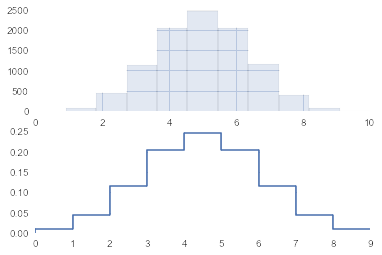

In [18]:
plt.subplot(211)
sns.distplot(lots_of_experiments,kde=False,rug=False,bins=len(set(lots_of_experiments)))
plt.xlim(0,10)
plt.subplot(212)
plt.step(range(10),binom.pmf(range(10),10,.5))

They are the same (approximately) and we got them in two different ways. One by direct and  simulation, and the other by some mathematical thinking. And this is the point of Monte Carlo. We can estimate/approximate the sampling distribution by doing repeated random draws and simulations. 

And the two methods represent the same thing (like two side of the same coin (sorry)). The closed form expression we found is simply the direct answer to questions about what the possible outcomes are. The Monte Carlo is simply a direct simulation of what the possible outcomes are. In this case, the Binomial distribution was easy enough to figure out, but this demonstrates that if we *can't* figure out the sampling distribution analytically, it is perfectly valid to simulate it. 

And this points to the history of classical statistics - a time in the early 20th century way before effective computers. Mathematicians such as Fisher, Neyman, and Pearson put a lot of effort into deriving exact expressions of these "sampling" distributions under different assumptions. And if your data and your questions fit those assumptions then go ahead and use those classical techniques. But here we are now with fast computing machines and we can get back to the basic question behind all of this which is, "If I did this experiment again, what would I see?". And now, we can just simulate that question, many times, to get and understanding an context about what we measured.

Monte Carlo methods were first introduced in the statistical physics community in the 1950s, in a method we'll go through later relating to Bayesian statistics. But the basic premise there was, "We're trying to study a complicated physical system (nuclear reactions) and we don't have a nice simple form for the answer we want. But we do have a big computer and access to random numbers, so we can sort of just simulate this thing over and over again and get an approximation to the question we're asking."

This, then, is the point of Monte Carlo. If we *know* the details of the process we're interested in (such as coin tossing), but we don't have the final answer to some qustion (we don't know about the binomial distribution), we can just simulate the process many times. We just need for-loops, no derivations. (As a teaser, later we'll go through Bootstrapping, a method that allows us to approximate some unknown sampling distribution, even if we know nothing about the process that generated the data.)

**Putting It Back Together**

Let's go back to our coin tossing game and pretend we care really deeply about the outcomes. Maybe we're playing a gambling game with someone, there's money on the line, and we're starting to suspect they are cheating. To make things a little more interesting let's increase the size of our tossing game from 10 consecutive tosses up to 50. 

Let's say we have a sneaky adversary who is tossing a rigged coin that is more likely to throw Tails than Heads. We see one outcome of this game and it looks like this:

In [41]:
gamble = r.choice(["H","T"],50, p=[.4,.6])
gamble

array(['T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'H',
       'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T',
       'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T'], 
      dtype='|S1')

Here's how many Heads we saw:

In [42]:
Counter(gamble)['H']

18

That's certainly less than the number of Heads we expect, which should be 25. But how much less? It it worrisome? Maybe it just happened that why by chance, we don't want to make false accusations and get kicked out of this casino. Well, the sampling distribution is exactly the quantification of all of this uncertainty.

So let's use Monte Carlo methods to simulate the sampling distribution of this game.

In [43]:
approx_sampling_distribution =  [how_many_heads(50) for i in range(25000)]

Then we simply need to ask, "How many of the possible outcomes have fewer Heads that the particular outcome I saw?". Simple enough in code:

In [44]:
sum([outcome < Counter(gamble)['H']  \
     for outcome in approx_sampling_distribution]) \
    / len(approx_sampling_distribution)

0.01608

So that's probability that we got that particular draw from a fair coin, pretty unlikely indeed. 

Or, we can ask this question more visually.... 

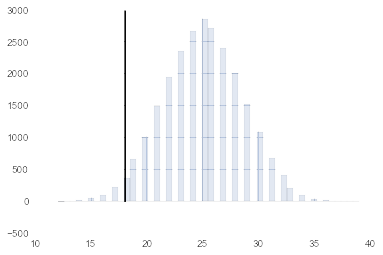

In [51]:
sns.distplot(approx_sampling_distribution,kde=False )
plt.vlines(Counter(gamble)['H'],0,3000)

In case you didn't notice, we're dancing right up to next to notions such as hypothesis testing and p-values. Our null hypothesis is that the coin is fair, and so we simulated its sampling distribution. We then asked where our observed outcome lies with respect to that expected sampling distribution. We then asked what's the probability that an outcome from the null sampling distribution is *more extreme* that the outcome we actually observed. That's a p-value. 

And for the sake of completeness, let's compare with the analytical answer. From the binomial distribution, we know we can calculate the probability of seeing $k$ Heads given 50 tosses. We simply need to sum up this probability for all the $k$ less than the number of Heads we observed. And we see that our simulated sampling was quite close, and can in fact be made arbitrarily accurate with more samples. 

**Another Example**

The point here is that whatever complex thing we're thinking about, whether it's coins and dice, or particle physics, or the stock market, we can pretty easily write a for-loop to get a sense of the *most probable* outcomes of that process. 

Here's a classic one you may have done before - estimating the value of Pi with random numbers. This one isn't solving a stastics problem per say, but is solving a calculus problem, though we wouldn't typically think of it that way. 

Here's the trick - imagine  the unit circle inscribed inside the unit square

http://etc.usf.edu/clipart/43400/43443/4c6_43443_lg.gif

We know the area of the unit square is 1x1=1 and the area of the unit circle is pi x r^2 = pi. So this pi thing, what is its numeric value? For simplicity, consider just the upper right quadrant of the unit square, so we now have an arc of the circle that has one quarter the area of the entire circle, so it has area pi/4.  

We proceed by throwing darts. Imagine this quarter-cirlce in a square is a dart board. If we throw a dart such that is does land somewhere inside the square board (we're at least decent at darts), what's the probability that it lands within the arc? No trick question here to this simple geometric probability puzzle. It's simply equal to the proportion of the area that the circle occupies relative to the total area of the square. So in this case, the probability is pi/4 / 1x1, so it's just the area of the square. (As I alluded, you can view this probability puzzle as a calculus problem, where we need to evaluate the ratio of two integrals.)

So given that we *expect* a random dart to land within the arc with probability pi/4, we can throw a *huge number* of random darts at this board and simply count the fraction that land within the arc.

http://mathfaculty.fullerton.edu/mathews/n2003/montecarlopi/MonteCarloPiMod/Images/MonteCarloPiMod_gr_25.gif

In [65]:
def dart_location():
    '''
    Throw a dart, where does it land
    '''
    x = r.rand()
    y = r.rand()
    return (x,y)

In [66]:
def magnitude(tuple2):
    '''
    Good ol' Pythagoras
    '''
    return np.sqrt(tuple2[0]**2+tuple2[1]**2)

In [76]:
num_darts = 1000000
arc = sum([magnitude(dart_location()) < 1 \ 
           for i in range(num_darts)]) / num_darts
arc * 4

3.141664

So this was just another example of how something that might be a really hard problem (calculating some integrals) can be approximated with clever use of random numbers. And note the relationship between integration of a function and the limiting properties of random samples drawn from a probability distribution

$ \int f(x) dx \approx \frac{1}{N} \sum_{i=1}^N x_i \\ \textrm{ where} \ x_i \sim f(x) $

This is a general idea called Monte Carlo Integration and it will come back with ferocity when we discuss MCMC.